Rohan Darji

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

#ML libraries 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import r2_score

In [13]:
data = pd.read_csv('household_power_consumption.txt',sep=';')

In [14]:
data

Date      Time Global_active_power Global_reactive_power  \
0        16/12/2006  17:24:00               4.216                 0.418   
1        16/12/2006  17:25:00               5.360                 0.436   
2        16/12/2006  17:26:00               5.374                 0.498   
3        16/12/2006  17:27:00               5.388                 0.502   
4        16/12/2006  17:28:00               3.666                 0.528   
...             ...       ...                 ...                   ...   
2075254  26/11/2010  20:58:00               0.946                     0   
2075255  26/11/2010  20:59:00               0.944                     0   
2075256  26/11/2010  21:00:00               0.938                     0   
2075257  26/11/2010  21:01:00               0.934                     0   
2075258  26/11/2010  21:02:00               0.932                     0   

         Voltage Global_intensity Sub_metering_1 Sub_metering_2  \
0        234.840           18.400          0.000          1.000   
1        233.630           23.000          0.000          1.000   
2        233.290           23.000          0.000          2.000   
3        233.740           23.000          0.000          1.000   
4        235.680           15.800          0.000          1.000   
...          ...              ...            ...            ...   
2075254   240.43                4              0              0   
2075255      240                4              0              0   
2075256   239.82              3.8              0              0   
2075257    239.7              3.8              0              0   
2075258   239.55              3.8              0              0   

         Sub_metering_3  
0                  17.0  
1                  16.0  
2                  17.0  
3                  17.0  
4                  17.0  
...                 ...  
2075254             0.0  
2075255             0.0  
2075256             0.0  
2075257             0.0  
2075258             0.0  

[2075259 rows x 9 columns]

In [16]:
data.head()

Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [22]:
#taking sample data out of all 2 lakhs+ data
data_sample = data.sample(n=50000,replace= False)
data_sample = data_sample.reset_index()
data_sample.drop("index",axis=1,inplace=True )

In [25]:
data_sample.head()

Date      Time Global_active_power Global_reactive_power  Voltage  \
0  29/7/2007  15:14:00               0.192                 0.116  234.850   
1   5/5/2010  00:23:00               0.252                 0.066  236.170   
2  15/1/2010  17:01:00               2.236                 0.238  245.920   
3  29/7/2008  02:25:00               0.420                 0.094  240.700   
4  6/10/2008  22:58:00               1.810                 0.048  237.960   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0            1.000          0.000          0.000             0.0  
1            1.000          0.000          0.000             1.0  
2            9.000          0.000          0.000            19.0  
3            2.000          0.000          0.000             1.0  
4            7.600          0.000          0.000            18.0

In [26]:
#file saved in csv format
data_sample.to_csv("sampled_data.csv",index=False)

In [31]:
#cheking out unique values in all features to form data cleaning 
for feature in feature:
    for feature in data_sample.columns:
        if feature not in ["Date","Time"]:
            print("feature {} has these {} unique values\n".format(feature, data_sample[feature].unique()))

feature Global_active_power has these ['0.192' '0.252' '2.236' ... '5.330' 4.742 '4.464'] unique values

feature Global_reactive_power has these ['0.116' '0.066' '0.238' '0.094' '0.048' '0.136' '0.078' '0.346' '0.224'
 '0.000' '0.170' '0.186' '0.254' '0.284' '0.108' '?' '0.240' '0.064'
 '0.092' '0.162' '0.190' '0.210' '0.188' '0.202' '0.114' '0.074' '0.196'
 '0.466' 0.048 '0.126' '0.118' '0.208' '0.124' '0.232' '0.072' '0.096'
 '0.100' '0.106' '0.216' '0.142' '0.132' '0.332' '0.080' '0.098' '0.112'
 '0.180' '0.046' '0.110' '0.084' '0.388' '0.102' 0.21 0.094 '0.348'
 '0.152' '0.250' '0.062' 0.07200000000000001 0.222 '0.246' '0.198' '0.140'
 '0.076' '0.518' '0.134' '0.344' '0.322' '0.256' '0.280' '0.088' '0.122'
 '0.588' 0.0 '0.220' '0.252' '0.230' '0.148' '0.258' '0.212' '0.104'
 '0.090' '0.144' '0.260' '0.070' '0.178' '0.218' '0.156' '0.052' '0.228'
 '0.050' '0.174' '0.468' 0.542 '0.184' '0.436' '0.082' '0.192' '0.392'
 '0.236' '0.274' '0.336' '0.502' '0.214' '0.164' '0.262' '0.056' '0


feature Global_reactive_power has these ['0.116' '0.066' '0.238' '0.094' '0.048' '0.136' '0.078' '0.346' '0.224'
 '0.000' '0.170' '0.186' '0.254' '0.284' '0.108' '?' '0.240' '0.064'
 '0.092' '0.162' '0.190' '0.210' '0.188' '0.202' '0.114' '0.074' '0.196'
 '0.466' 0.048 '0.126' '0.118' '0.208' '0.124' '0.232' '0.072' '0.096'
 '0.100' '0.106' '0.216' '0.142' '0.132' '0.332' '0.080' '0.098' '0.112'
 '0.180' '0.046' '0.110' '0.084' '0.388' '0.102' 0.21 0.094 '0.348'
 '0.152' '0.250' '0.062' 0.07200000000000001 0.222 '0.246' '0.198' '0.140'
 '0.076' '0.518' '0.134' '0.344' '0.322' '0.256' '0.280' '0.088' '0.122'
 '0.588' 0.0 '0.220' '0.252' '0.230' '0.148' '0.258' '0.212' '0.104'
 '0.090' '0.144' '0.260' '0.070' '0.178' '0.218' '0.156' '0.052' '0.228'
 '0.050' '0.174' '0.468' 0.542 '0.184' '0.436' '0.082' '0.192' '0.392'
 '0.236' '0.274' '0.336' '0.502' '0.214' '0.164' '0.262' '0.056' '0.278'
 '0.446' '0.200' '0.340' '0.500' '0.310' '0.290' '0.068' '0.276' '0.206'
 0.106 '0.562' '0.160' '0


feature Sub_metering_1 has these ['0.000' '28.000' '1.000' '?' '36.000' 0.0 '4.000' '38.000' '2.000'
 '12.000' '32.000' '39.000' '37.000' '35.000' '45.000' '14.000' '5.000'
 '51.000' 1.0 '9.000' '46.000' '22.000' '33.000' '40.000' '18.000' 32.0
 37.0 13.0 '23.000' '17.000' '13.000' '54.000' '41.000' '10.000' '21.000'
 '34.000' '74.000' '16.000' '20.000' '26.000' '11.000' 2.0 '55.000'
 '44.000' '29.000' 26.0 '15.000' '31.000' '30.000' 39.0 '19.000' '6.000'
 17.0 '49.000' '27.000' '25.000' '43.000' '8.000' '48.000' '63.000'
 '7.000' '53.000' '42.000' 16.0 36.0 '24.000' '3.000' 8.0 '52.000' 25.0
 '80.000' 38.0 21.0 '87.000' 10.0 '47.000' '79.000' 45.0 15.0 '70.000'
 43.0 20.0 40.0 14.0 '56.000' '73.000' 23.0 11.0 19.0] unique values

feature Sub_metering_2 has these ['0.000' '1.000' '2.000' '36.000' '?' '17.000' 0.0 '4.000' '35.000' 1.0
 '27.000' '73.000' '9.000' '5.000' '37.000' '41.000' '33.000' '28.000'
 38.0 2.0 '3.000' '26.000' '23.000' '22.000' '21.000' '19.000' '32.000'
 '34.000' 

In [49]:
#dropping null values
data_sample.dropna(inplace=True)

In [51]:
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49414 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   49414 non-null  object 
 1   Time                   49414 non-null  object 
 2   Global_active_power    49414 non-null  object 
 3   Global_reactive_power  49414 non-null  object 
 4   Voltage                49414 non-null  object 
 5   Global_intensity       49414 non-null  object 
 6   Sub_metering_1         49414 non-null  object 
 7   Sub_metering_2         49414 non-null  object 
 8   Sub_metering_3         49414 non-null  float64
dtypes: float64(1), object(8)
memory usage: 3.8+ MB


In [52]:
#checking values in Sub_metering_1 2 and 3 feature 
# observation: all values are integers but in float data type so can be converted to int data type
#converting to str datatype so replace function can be used.
data_sample['Sub_metering_3'] = data_sample['Sub_metering_3'].astype(str)

In [53]:
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49414 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date                   49414 non-null  object
 1   Time                   49414 non-null  object
 2   Global_active_power    49414 non-null  object
 3   Global_reactive_power  49414 non-null  object
 4   Voltage                49414 non-null  object
 5   Global_intensity       49414 non-null  object
 6   Sub_metering_1         49414 non-null  object
 7   Sub_metering_2         49414 non-null  object
 8   Sub_metering_3         49414 non-null  object
dtypes: object(9)
memory usage: 5.0+ MB


In [61]:
#float values into an integer
data_sample['Sub_metering_1'] = data_sample['Sub_metering_1'].str.split(".",expand=True)
data_sample['Sub_metering_2'] = data_sample['Sub_metering_2'].str.split(".",expand=True)
data_sample['Sub_metering_3'] = data_sample['Sub_metering_3'].str.split(".",expand=True)

In [60]:
data_sample['Sub_metering_1'].unique()

array(['0', '28', '1', '36', nan, '4', '38', '2', '12', '32', '39', '37',
       '35', '45', '14', '5', '51', '9', '46', '22', '33', '40', '18',
       '23', '17', '13', '54', '41', '10', '21', '34', '74', '16', '20',
       '26', '11', '55', '44', '29', '15', '31', '30', '19', '6', '49',
       '27', '25', '43', '8', '48', '63', '7', '53', '42', '24', '3',
       '52', '80', '87', '47', '79', '70', '56', '73'], dtype=object)

In [62]:
data_sample['Sub_metering_2'].unique()

array(['0', '1', '2', '36', '17', nan, '4', '35', '27', '73', '9', '5',
       '37', '41', '33', '28', '3', '26', '23', '22', '21', '19', '32',
       '34', '16', '6', '7', '30', '72', '29', '14', '10', '24', '39',
       '38', '69', '31', '62', '55', '18', '20', '75', '25', '56', '8',
       '46', '15', '40', '44', '11', '74', '67', '71', '70', '64', '12',
       '68', '13', '53', '42', '43', '61', '58', '65', '76', '47', '45',
       '77', '60', '66', '52', '54'], dtype=object)

In [63]:
data_sample['Sub_metering_3'].unique()

array(['0', '1', '19', '18', '17', '12', '16', '28', '3', '11', '27',
       '30', '14', '13', '10', '5', '2', '9', '6', '26', '29', '25', '8',
       '21', '31', '24', '20', '7', '4', '22', '23', '15'], dtype=object)

In [64]:
data_sample.head()

Date      Time Global_active_power Global_reactive_power  Voltage  \
0  29/7/2007  15:14:00               0.192                 0.116  234.850   
1   5/5/2010  00:23:00               0.252                 0.066  236.170   
2  15/1/2010  17:01:00               2.236                 0.238  245.920   
3  29/7/2008  02:25:00               0.420                 0.094  240.700   
4  6/10/2008  22:58:00               1.810                 0.048  237.960   

  Global_intensity Sub_metering_1 Sub_metering_2 Sub_metering_3  
0            1.000              0              0              0  
1            1.000              0              0              1  
2            9.000              0              0             19  
3            2.000              0              0              1  
4            7.600              0              0             18

In [65]:
#checking null values
data_sample.isnull().sum()

Date                        0
Time                        0
Global_active_power         0
Global_reactive_power       0
Voltage                     0
Global_intensity            0
Sub_metering_1           1044
Sub_metering_2           1044
Sub_metering_3              0
dtype: int64

In [66]:
data_sample.dropna(inplace=True)

In [67]:
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48370 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date                   48370 non-null  object
 1   Time                   48370 non-null  object
 2   Global_active_power    48370 non-null  object
 3   Global_reactive_power  48370 non-null  object
 4   Voltage                48370 non-null  object
 5   Global_intensity       48370 non-null  object
 6   Sub_metering_1         48370 non-null  object
 7   Sub_metering_2         48370 non-null  object
 8   Sub_metering_3         48370 non-null  object
dtypes: object(9)
memory usage: 3.7+ MB


In [68]:
data_sample.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [69]:
#changing data type of features according to dataset
change_dtype={"Global_active_power":"float64","Global_reactive_power":"float64","Voltage":"float64","Global_intensity":"float64",
              "Sub_metering_1":"int64","Sub_metering_2":"int64","Sub_metering_3":"int64"} 
data_sample = data_sample.astype(change_dtype)

In [70]:
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48370 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   48370 non-null  object 
 1   Time                   48370 non-null  object 
 2   Global_active_power    48370 non-null  float64
 3   Global_reactive_power  48370 non-null  float64
 4   Voltage                48370 non-null  float64
 5   Global_intensity       48370 non-null  float64
 6   Sub_metering_1         48370 non-null  int64  
 7   Sub_metering_2         48370 non-null  int64  
 8   Sub_metering_3         48370 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 4.9+ MB


In [74]:
#converting date feature to datetime
data_sample['Date']=pd.to_datetime(data_sample['Date'], format="%d/%m/%Y")

In [77]:
#seperating day and month 
data_sample['day']= data_sample['Date'].dt.day
data_sample['month']= data_sample['Date'].dt.month

In [80]:
data_sample.drop('Time',axis=1,inplace=True)

In [82]:
data_sample.drop('Date',axis=1,inplace=True)

In [83]:
data_sample.head()

Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
0                0.192                  0.116   234.85               1.0   
1                0.252                  0.066   236.17               1.0   
2                2.236                  0.238   245.92               9.0   
3                0.420                  0.094   240.70               2.0   
4                1.810                  0.048   237.96               7.6   

   Sub_metering_1  Sub_metering_2  Sub_metering_3  month  day  
0               0               0               0      7   29  
1               0               0               1      5    5  
2               0               0              19      1   15  
3               0               0               1      7   29  
4               0               0              18     10    6

In [84]:
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48370 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    48370 non-null  float64
 1   Global_reactive_power  48370 non-null  float64
 2   Voltage                48370 non-null  float64
 3   Global_intensity       48370 non-null  float64
 4   Sub_metering_1         48370 non-null  int64  
 5   Sub_metering_2         48370 non-null  int64  
 6   Sub_metering_3         48370 non-null  int64  
 7   month                  48370 non-null  int64  
 8   day                    48370 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 4.9 MB


In [85]:
data_sample['Total_power_use'] = data_sample['Sub_metering_1']+data_sample['Sub_metering_2']+data_sample['Sub_metering_3']
data_sample.head()

Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
0                0.192                  0.116   234.85               1.0   
1                0.252                  0.066   236.17               1.0   
2                2.236                  0.238   245.92               9.0   
3                0.420                  0.094   240.70               2.0   
4                1.810                  0.048   237.96               7.6   

   Sub_metering_1  Sub_metering_2  Sub_metering_3  month  day  Total_power_use  
0               0               0               0      7   29                0  
1               0               0               1      5    5                1  
2               0               0              19      1   15               19  
3               0               0               1      7   29                1  
4               0               0              18     10    6               18

In [86]:
data_sample.to_csv("cleaned_data_powerconsumption.csv",index=False)

In [88]:
#Inserting data into mongodb
## creating connection with MongoDB
import pymongo
client = pymongo.MongoClient("mongodb://localhost:27017/?readPreference=primary&directConnection=true&ssl=false")
## creating database and collection in MongoDB
db = client['Power_consumptions']
collection = db['Household_power']
## Converting dataframe to dict so it can be uploaded to MongoDB
data_sample.reset_index(inplace=True)
data_dict = data_sample.to_dict("records")
#Insert collection to MongoDB
collection.insert_many(data_dict)

In [96]:
#Retreving data from mongodb
for i in collection.find():
    print(i)

{'_id': ObjectId('63a3f930f29c97220bdde143'), 'index': 0, 'Global_active_power': 0.192, 'Global_reactive_power': 0.116, 'Voltage': 234.85, 'Global_intensity': 1.0, 'Sub_metering_1': 0, 'Sub_metering_2': 0, 'Sub_metering_3': 0, 'month': 7, 'day': 29, 'Total_power_use': 0}
{'_id': ObjectId('63a3f930f29c97220bdde144'), 'index': 1, 'Global_active_power': 0.252, 'Global_reactive_power': 0.066, 'Voltage': 236.17, 'Global_intensity': 1.0, 'Sub_metering_1': 0, 'Sub_metering_2': 0, 'Sub_metering_3': 1, 'month': 5, 'day': 5, 'Total_power_use': 1}
{'_id': ObjectId('63a3f930f29c97220bdde145'), 'index': 2, 'Global_active_power': 2.236, 'Global_reactive_power': 0.238, 'Voltage': 245.92, 'Global_intensity': 9.0, 'Sub_metering_1': 0, 'Sub_metering_2': 0, 'Sub_metering_3': 19, 'month': 1, 'day': 15, 'Total_power_use': 19}
{'_id': ObjectId('63a3f930f29c97220bdde146'), 'index': 3, 'Global_active_power': 0.42, 'Global_reactive_power': 0.094, 'Voltage': 240.7, 'Global_intensity': 2.0, 'Sub_metering_1': 0, 

{'_id': ObjectId('63a3f930f29c97220bdde1a8'), 'index': 108, 'Global_active_power': 1.282, 'Global_reactive_power': 0.0, 'Voltage': 238.38, 'Global_intensity': 5.4, 'Sub_metering_1': 1, 'Sub_metering_2': 0, 'Sub_metering_3': 0, 'month': 1, 'day': 28, 'Total_power_use': 1}
{'_id': ObjectId('63a3f930f29c97220bdde1a9'), 'index': 109, 'Global_active_power': 3.896, 'Global_reactive_power': 0.198, 'Voltage': 239.02, 'Global_intensity': 16.2, 'Sub_metering_1': 38, 'Sub_metering_2': 0, 'Sub_metering_3': 1, 'month': 9, 'day': 19, 'Total_power_use': 39}
{'_id': ObjectId('63a3f930f29c97220bdde1aa'), 'index': 110, 'Global_active_power': 1.89, 'Global_reactive_power': 0.14, 'Voltage': 239.37, 'Global_intensity': 7.8, 'Sub_metering_1': 0, 'Sub_metering_2': 1, 'Sub_metering_3': 18, 'month': 3, 'day': 26, 'Total_power_use': 19}
{'_id': ObjectId('63a3f930f29c97220bdde1ab'), 'index': 111, 'Global_active_power': 1.372, 'Global_reactive_power': 0.076, 'Voltage': 242.23, 'Global_intensity': 5.6, 'Sub_meteri

{'_id': ObjectId('63a3f930f29c97220bdde8c5'), 'index': 1986, 'Global_active_power': 0.456, 'Global_reactive_power': 0.218, 'Voltage': 243.17, 'Global_intensity': 2.0, 'Sub_metering_1': 0, 'Sub_metering_2': 1, 'Sub_metering_3': 1, 'month': 10, 'day': 25, 'Total_power_use': 2}
{'_id': ObjectId('63a3f930f29c97220bdde8c6'), 'index': 1987, 'Global_active_power': 0.626, 'Global_reactive_power': 0.104, 'Voltage': 244.07, 'Global_intensity': 2.6, 'Sub_metering_1': 0, 'Sub_metering_2': 0, 'Sub_metering_3': 0, 'month': 11, 'day': 8, 'Total_power_use': 0}
{'_id': ObjectId('63a3f930f29c97220bdde8c7'), 'index': 1988, 'Global_active_power': 2.422, 'Global_reactive_power': 0.102, 'Voltage': 240.34, 'Global_intensity': 10.0, 'Sub_metering_1': 1, 'Sub_metering_2': 0, 'Sub_metering_3': 18, 'month': 12, 'day': 22, 'Total_power_use': 19}
{'_id': ObjectId('63a3f930f29c97220bdde8c8'), 'index': 1989, 'Global_active_power': 0.458, 'Global_reactive_power': 0.056, 'Voltage': 245.68, 'Global_intensity': 1.8, 'Su

{'_id': ObjectId('63a3f930f29c97220bddf0cc'), 'index': 4104, 'Global_active_power': 0.35, 'Global_reactive_power': 0.0, 'Voltage': 242.61, 'Global_intensity': 1.4, 'Sub_metering_1': 0, 'Sub_metering_2': 0, 'Sub_metering_3': 0, 'month': 4, 'day': 13, 'Total_power_use': 0}
{'_id': ObjectId('63a3f930f29c97220bddf0cd'), 'index': 4105, 'Global_active_power': 1.956, 'Global_reactive_power': 0.0, 'Voltage': 243.44, 'Global_intensity': 8.0, 'Sub_metering_1': 0, 'Sub_metering_2': 0, 'Sub_metering_3': 18, 'month': 12, 'day': 25, 'Total_power_use': 18}
{'_id': ObjectId('63a3f930f29c97220bddf0ce'), 'index': 4106, 'Global_active_power': 2.498, 'Global_reactive_power': 0.252, 'Voltage': 241.86, 'Global_intensity': 10.4, 'Sub_metering_1': 0, 'Sub_metering_2': 1, 'Sub_metering_3': 0, 'month': 12, 'day': 26, 'Total_power_use': 1}
{'_id': ObjectId('63a3f930f29c97220bddf0cf'), 'index': 4107, 'Global_active_power': 1.438, 'Global_reactive_power': 0.098, 'Voltage': 239.32, 'Global_intensity': 6.0, 'Sub_met

{'_id': ObjectId('63a3f930f29c97220bddf6a8'), 'index': 5661, 'Global_active_power': 0.33, 'Global_reactive_power': 0.22, 'Voltage': 240.76, 'Global_intensity': 1.6, 'Sub_metering_1': 0, 'Sub_metering_2': 1, 'Sub_metering_3': 1, 'month': 8, 'day': 12, 'Total_power_use': 2}
{'_id': ObjectId('63a3f930f29c97220bddf6a9'), 'index': 5662, 'Global_active_power': 0.216, 'Global_reactive_power': 0.0, 'Voltage': 240.52, 'Global_intensity': 0.8, 'Sub_metering_1': 0, 'Sub_metering_2': 0, 'Sub_metering_3': 0, 'month': 4, 'day': 14, 'Total_power_use': 0}
{'_id': ObjectId('63a3f930f29c97220bddf6aa'), 'index': 5663, 'Global_active_power': 4.332, 'Global_reactive_power': 0.064, 'Voltage': 240.85, 'Global_intensity': 18.0, 'Sub_metering_1': 0, 'Sub_metering_2': 0, 'Sub_metering_3': 18, 'month': 2, 'day': 10, 'Total_power_use': 18}
{'_id': ObjectId('63a3f930f29c97220bddf6ab'), 'index': 5664, 'Global_active_power': 0.584, 'Global_reactive_power': 0.442, 'Voltage': 240.36, 'Global_intensity': 3.2, 'Sub_mete

{'_id': ObjectId('63a3f930f29c97220bddfcd8'), 'index': 7298, 'Global_active_power': 0.418, 'Global_reactive_power': 0.088, 'Voltage': 242.68, 'Global_intensity': 1.8, 'Sub_metering_1': 0, 'Sub_metering_2': 1, 'Sub_metering_3': 1, 'month': 5, 'day': 10, 'Total_power_use': 2}
{'_id': ObjectId('63a3f930f29c97220bddfcd9'), 'index': 7299, 'Global_active_power': 2.776, 'Global_reactive_power': 0.142, 'Voltage': 241.94, 'Global_intensity': 11.4, 'Sub_metering_1': 0, 'Sub_metering_2': 0, 'Sub_metering_3': 18, 'month': 1, 'day': 13, 'Total_power_use': 18}
{'_id': ObjectId('63a3f930f29c97220bddfcda'), 'index': 7300, 'Global_active_power': 0.338, 'Global_reactive_power': 0.206, 'Voltage': 241.85, 'Global_intensity': 1.6, 'Sub_metering_1': 0, 'Sub_metering_2': 1, 'Sub_metering_3': 1, 'month': 9, 'day': 13, 'Total_power_use': 2}
{'_id': ObjectId('63a3f930f29c97220bddfcdb'), 'index': 7301, 'Global_active_power': 0.438, 'Global_reactive_power': 0.312, 'Voltage': 241.45, 'Global_intensity': 2.2, 'Sub_

{'_id': ObjectId('63a3f930f29c97220bde034e'), 'index': 9012, 'Global_active_power': 0.392, 'Global_reactive_power': 0.17, 'Voltage': 245.91, 'Global_intensity': 1.8, 'Sub_metering_1': 0, 'Sub_metering_2': 0, 'Sub_metering_3': 0, 'month': 1, 'day': 6, 'Total_power_use': 0}
{'_id': ObjectId('63a3f930f29c97220bde034f'), 'index': 9014, 'Global_active_power': 1.468, 'Global_reactive_power': 0.072, 'Voltage': 240.36, 'Global_intensity': 6.0, 'Sub_metering_1': 0, 'Sub_metering_2': 0, 'Sub_metering_3': 18, 'month': 7, 'day': 24, 'Total_power_use': 18}
{'_id': ObjectId('63a3f930f29c97220bde0350'), 'index': 9015, 'Global_active_power': 0.282, 'Global_reactive_power': 0.2, 'Voltage': 239.7, 'Global_intensity': 1.4, 'Sub_metering_1': 0, 'Sub_metering_2': 0, 'Sub_metering_3': 0, 'month': 7, 'day': 14, 'Total_power_use': 0}
{'_id': ObjectId('63a3f930f29c97220bde0351'), 'index': 9016, 'Global_active_power': 1.474, 'Global_reactive_power': 0.084, 'Voltage': 238.28, 'Global_intensity': 6.2, 'Sub_meteri

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



{'_id': ObjectId('63a3f930f29c97220bde5079'), 'index': 29405, 'Global_active_power': 2.99, 'Global_reactive_power': 0.45, 'Voltage': 243.84, 'Global_intensity': 12.4, 'Sub_metering_1': 0, 'Sub_metering_2': 0, 'Sub_metering_3': 19, 'month': 1, 'day': 8, 'Total_power_use': 19}
{'_id': ObjectId('63a3f930f29c97220bde507a'), 'index': 29406, 'Global_active_power': 1.386, 'Global_reactive_power': 0.0, 'Voltage': 247.54, 'Global_intensity': 5.6, 'Sub_metering_1': 0, 'Sub_metering_2': 0, 'Sub_metering_3': 19, 'month': 12, 'day': 11, 'Total_power_use': 19}
{'_id': ObjectId('63a3f930f29c97220bde507b'), 'index': 29407, 'Global_active_power': 0.254, 'Global_reactive_power': 0.0, 'Voltage': 240.75, 'Global_intensity': 1.0, 'Sub_metering_1': 0, 'Sub_metering_2': 0, 'Sub_metering_3': 1, 'month': 5, 'day': 18, 'Total_power_use': 1}
{'_id': ObjectId('63a3f930f29c97220bde507c'), 'index': 29408, 'Global_active_power': 0.25, 'Global_reactive_power': 0.0, 'Voltage': 241.81, 'Global_intensity': 1.0, 'Sub_met

{'_id': ObjectId('63a3f930f29c97220bde55a4'), 'index': 30770, 'Global_active_power': 0.34, 'Global_reactive_power': 0.126, 'Voltage': 245.13, 'Global_intensity': 1.4, 'Sub_metering_1': 0, 'Sub_metering_2': 0, 'Sub_metering_3': 1, 'month': 3, 'day': 25, 'Total_power_use': 1}
{'_id': ObjectId('63a3f930f29c97220bde55a5'), 'index': 30771, 'Global_active_power': 0.326, 'Global_reactive_power': 0.05, 'Voltage': 243.23, 'Global_intensity': 1.4, 'Sub_metering_1': 0, 'Sub_metering_2': 0, 'Sub_metering_3': 1, 'month': 2, 'day': 27, 'Total_power_use': 1}
{'_id': ObjectId('63a3f930f29c97220bde55a6'), 'index': 30772, 'Global_active_power': 1.358, 'Global_reactive_power': 0.046, 'Voltage': 243.33, 'Global_intensity': 5.6, 'Sub_metering_1': 0, 'Sub_metering_2': 0, 'Sub_metering_3': 18, 'month': 3, 'day': 27, 'Total_power_use': 18}
{'_id': ObjectId('63a3f930f29c97220bde55a7'), 'index': 30773, 'Global_active_power': 0.314, 'Global_reactive_power': 0.204, 'Voltage': 238.17, 'Global_intensity': 1.6, 'Sub

{'_id': ObjectId('63a3f930f29c97220bde5af9'), 'index': 32173, 'Global_active_power': 0.276, 'Global_reactive_power': 0.118, 'Voltage': 239.39, 'Global_intensity': 1.2, 'Sub_metering_1': 0, 'Sub_metering_2': 1, 'Sub_metering_3': 1, 'month': 6, 'day': 6, 'Total_power_use': 2}
{'_id': ObjectId('63a3f930f29c97220bde5afa'), 'index': 32174, 'Global_active_power': 1.988, 'Global_reactive_power': 0.296, 'Voltage': 244.12, 'Global_intensity': 8.2, 'Sub_metering_1': 0, 'Sub_metering_2': 1, 'Sub_metering_3': 19, 'month': 2, 'day': 14, 'Total_power_use': 20}
{'_id': ObjectId('63a3f930f29c97220bde5afb'), 'index': 32175, 'Global_active_power': 0.114, 'Global_reactive_power': 0.0, 'Voltage': 241.77, 'Global_intensity': 0.4, 'Sub_metering_1': 0, 'Sub_metering_2': 0, 'Sub_metering_3': 0, 'month': 8, 'day': 26, 'Total_power_use': 0}
{'_id': ObjectId('63a3f930f29c97220bde5afc'), 'index': 32176, 'Global_active_power': 0.242, 'Global_reactive_power': 0.0, 'Voltage': 242.15, 'Global_intensity': 1.2, 'Sub_me

{'_id': ObjectId('63a3f930f29c97220bde620b'), 'index': 34041, 'Global_active_power': 1.418, 'Global_reactive_power': 0.078, 'Voltage': 235.96, 'Global_intensity': 6.0, 'Sub_metering_1': 0, 'Sub_metering_2': 0, 'Sub_metering_3': 17, 'month': 3, 'day': 16, 'Total_power_use': 17}
{'_id': ObjectId('63a3f930f29c97220bde620c'), 'index': 34042, 'Global_active_power': 0.35, 'Global_reactive_power': 0.108, 'Voltage': 242.13, 'Global_intensity': 1.4, 'Sub_metering_1': 0, 'Sub_metering_2': 0, 'Sub_metering_3': 0, 'month': 10, 'day': 12, 'Total_power_use': 0}
{'_id': ObjectId('63a3f930f29c97220bde620d'), 'index': 34043, 'Global_active_power': 2.442, 'Global_reactive_power': 0.104, 'Voltage': 237.7, 'Global_intensity': 10.4, 'Sub_metering_1': 0, 'Sub_metering_2': 0, 'Sub_metering_3': 0, 'month': 4, 'day': 10, 'Total_power_use': 0}
{'_id': ObjectId('63a3f930f29c97220bde620e'), 'index': 34044, 'Global_active_power': 0.14, 'Global_reactive_power': 0.0, 'Voltage': 241.38, 'Global_intensity': 0.6, 'Sub_

{'_id': ObjectId('63a3f930f29c97220bde66f0'), 'index': 35343, 'Global_active_power': 1.348, 'Global_reactive_power': 0.0, 'Voltage': 242.13, 'Global_intensity': 5.6, 'Sub_metering_1': 0, 'Sub_metering_2': 0, 'Sub_metering_3': 19, 'month': 3, 'day': 23, 'Total_power_use': 19}
{'_id': ObjectId('63a3f930f29c97220bde66f1'), 'index': 35344, 'Global_active_power': 1.084, 'Global_reactive_power': 0.0, 'Voltage': 239.69, 'Global_intensity': 4.4, 'Sub_metering_1': 0, 'Sub_metering_2': 0, 'Sub_metering_3': 1, 'month': 9, 'day': 18, 'Total_power_use': 1}
{'_id': ObjectId('63a3f930f29c97220bde66f2'), 'index': 35345, 'Global_active_power': 1.376, 'Global_reactive_power': 0.07, 'Voltage': 240.52, 'Global_intensity': 5.6, 'Sub_metering_1': 0, 'Sub_metering_2': 0, 'Sub_metering_3': 18, 'month': 3, 'day': 27, 'Total_power_use': 18}
{'_id': ObjectId('63a3f930f29c97220bde66f3'), 'index': 35346, 'Global_active_power': 2.068, 'Global_reactive_power': 0.054, 'Voltage': 241.44, 'Global_intensity': 8.4, 'Sub_

{'_id': ObjectId('63a3f930f29c97220bde6dea'), 'index': 37192, 'Global_active_power': 1.404, 'Global_reactive_power': 0.1, 'Voltage': 238.84, 'Global_intensity': 5.8, 'Sub_metering_1': 0, 'Sub_metering_2': 0, 'Sub_metering_3': 18, 'month': 4, 'day': 13, 'Total_power_use': 18}
{'_id': ObjectId('63a3f930f29c97220bde6deb'), 'index': 37193, 'Global_active_power': 1.338, 'Global_reactive_power': 0.05, 'Voltage': 244.25, 'Global_intensity': 5.4, 'Sub_metering_1': 0, 'Sub_metering_2': 0, 'Sub_metering_3': 19, 'month': 11, 'day': 1, 'Total_power_use': 19}
{'_id': ObjectId('63a3f930f29c97220bde6dec'), 'index': 37194, 'Global_active_power': 1.374, 'Global_reactive_power': 0.0, 'Voltage': 242.75, 'Global_intensity': 5.6, 'Sub_metering_1': 1, 'Sub_metering_2': 0, 'Sub_metering_3': 18, 'month': 1, 'day': 25, 'Total_power_use': 19}
{'_id': ObjectId('63a3f930f29c97220bde6ded'), 'index': 37195, 'Global_active_power': 0.186, 'Global_reactive_power': 0.072, 'Voltage': 234.66, 'Global_intensity': 0.8, 'Su

{'_id': ObjectId('63a3f930f29c97220bde743b'), 'index': 38855, 'Global_active_power': 1.348, 'Global_reactive_power': 0.0, 'Voltage': 242.79, 'Global_intensity': 5.4, 'Sub_metering_1': 0, 'Sub_metering_2': 0, 'Sub_metering_3': 19, 'month': 4, 'day': 8, 'Total_power_use': 19}
{'_id': ObjectId('63a3f930f29c97220bde743c'), 'index': 38856, 'Global_active_power': 0.348, 'Global_reactive_power': 0.362, 'Voltage': 242.32, 'Global_intensity': 2.0, 'Sub_metering_1': 0, 'Sub_metering_2': 1, 'Sub_metering_3': 0, 'month': 9, 'day': 16, 'Total_power_use': 1}
{'_id': ObjectId('63a3f930f29c97220bde743d'), 'index': 38857, 'Global_active_power': 0.554, 'Global_reactive_power': 0.32, 'Voltage': 240.17, 'Global_intensity': 2.6, 'Sub_metering_1': 0, 'Sub_metering_2': 1, 'Sub_metering_3': 0, 'month': 7, 'day': 17, 'Total_power_use': 1}
{'_id': ObjectId('63a3f930f29c97220bde743e'), 'index': 38858, 'Global_active_power': 2.206, 'Global_reactive_power': 0.24, 'Voltage': 232.89, 'Global_intensity': 9.6, 'Sub_me

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [97]:
data_from_mongo = collection.find()
data_mongo = pd.DataFrame(data=data_from_mongo)

In [98]:
data_mongo.head()

_id  index  Global_active_power  \
0  63a3f930f29c97220bdde143      0                0.192   
1  63a3f930f29c97220bdde144      1                0.252   
2  63a3f930f29c97220bdde145      2                2.236   
3  63a3f930f29c97220bdde146      3                0.420   
4  63a3f930f29c97220bdde147      4                1.810   

   Global_reactive_power  Voltage  Global_intensity  Sub_metering_1  \
0                  0.116   234.85               1.0               0   
1                  0.066   236.17               1.0               0   
2                  0.238   245.92               9.0               0   
3                  0.094   240.70               2.0               0   
4                  0.048   237.96               7.6               0   

   Sub_metering_2  Sub_metering_3  month  day  Total_power_use  
0               0               0      7   29                0  
1               0               1      5    5                1  
2               0              19      1   15               19  
3               0               1      7   29                1  
4               0              18     10    6               18

In [99]:
data_mongo.drop(['_id','index'], axis=1, inplace=True)

In [100]:
data_mongo.head()

Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
0                0.192                  0.116   234.85               1.0   
1                0.252                  0.066   236.17               1.0   
2                2.236                  0.238   245.92               9.0   
3                0.420                  0.094   240.70               2.0   
4                1.810                  0.048   237.96               7.6   

   Sub_metering_1  Sub_metering_2  Sub_metering_3  month  day  Total_power_use  
0               0               0               0      7   29                0  
1               0               0               1      5    5                1  
2               0               0              19      1   15               19  
3               0               0               1      7   29                1  
4               0               0              18     10    6               18

In [101]:
data_mongo.describe()

Global_active_power  Global_reactive_power       Voltage  \
count         48370.000000           48370.000000  48370.000000   
mean              1.080630               0.123942    240.834691   
std               1.046794               0.112769      3.212091   
min               0.078000               0.000000    225.160000   
25%               0.306000               0.048000    239.010000   
50%               0.592000               0.100000    240.990000   
75%               1.522000               0.196000    242.850000   
max               9.392000               0.976000    253.610000   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
count      48370.000000    48370.000000    48370.000000    48370.000000   
mean           4.583300        1.132954        1.266963        6.416064   
std            4.399642        6.135564        5.683540        8.423996   
min            0.200000        0.000000        0.000000        0.000000   
25%            1.400000        0.000000        0.000000        0.000000   
50%            2.600000        0.000000        0.000000        1.000000   
75%            6.400000        0.000000        1.000000       17.000000   
max           41.400000       87.000000       77.000000       31.000000   

              month           day  Total_power_use  
count  48370.000000  48370.000000     48370.000000  
mean       6.372814     15.739570         8.815981  
std        3.391075      8.795487        12.751102  
min        1.000000      1.000000         0.000000  
25%        3.000000      8.000000         0.000000  
50%        6.000000     16.000000         1.000000  
75%        9.000000     23.000000        18.000000  
max       12.000000     31.000000       130.000000

# Analysis of Data

In [102]:
#getting list of discrete numerical features
discrete_feature =[feature for feature in data_mongo.columns if data_mongo[feature].nunique()<32 ]


In [103]:
discrete_feature

['month', 'day']

In [104]:
#getting list of continuous  numerical features
con_numerical_feature = [feature for feature in data_mongo.columns if feature not in discrete_feature]

In [105]:
con_numerical_feature

['Global_active_power',
 'Global_reactive_power',
 'Voltage',
 'Global_intensity',
 'Sub_metering_1',
 'Sub_metering_2',
 'Sub_metering_3',
 'Total_power_use']

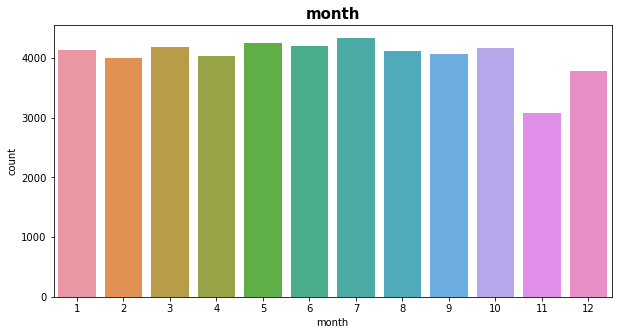

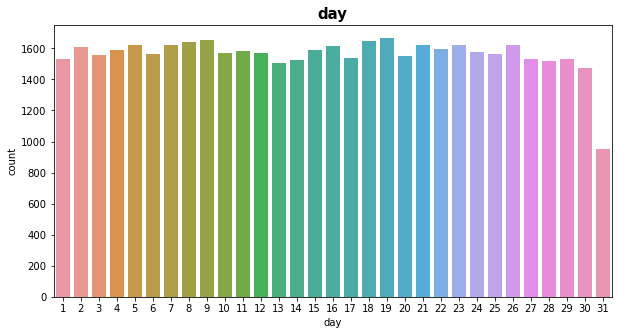

In [110]:
for feature in discrete_feature:
 plt.figure(figsize=(10,5))
 sns.countplot(data=data_mongo, x=feature)
 plt.title(feature, fontsize=15, weight='bold')
 plt.show();


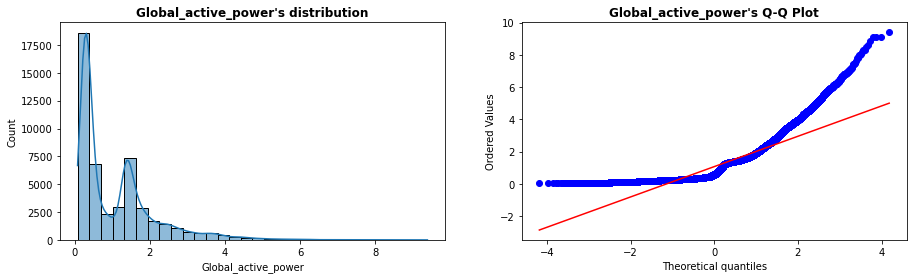

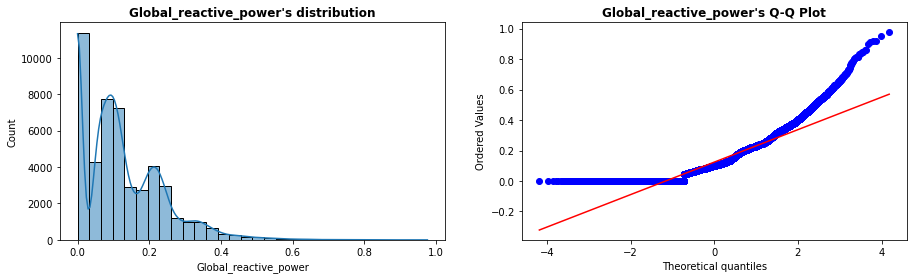

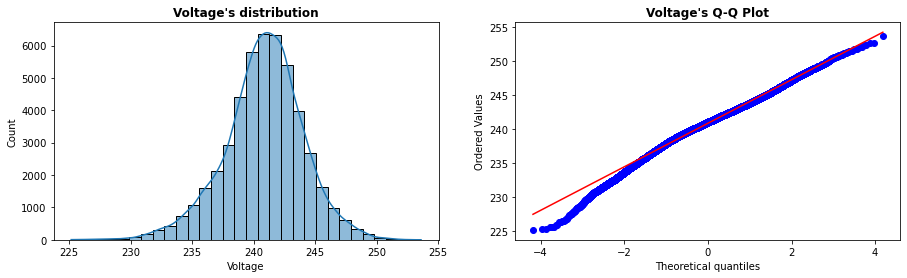

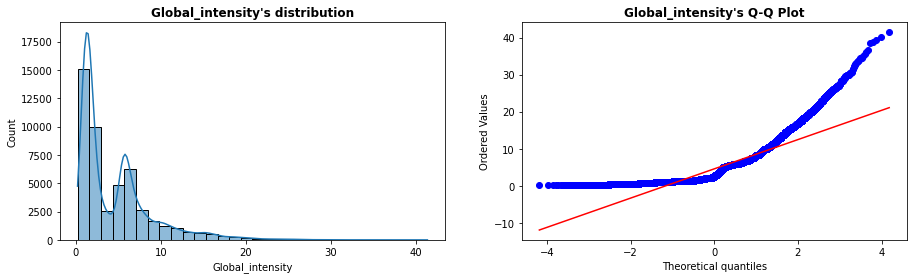

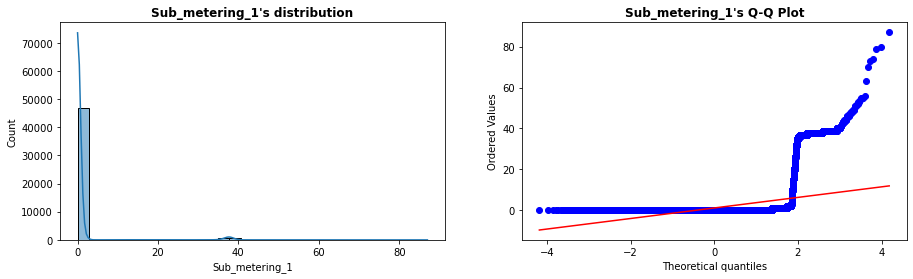

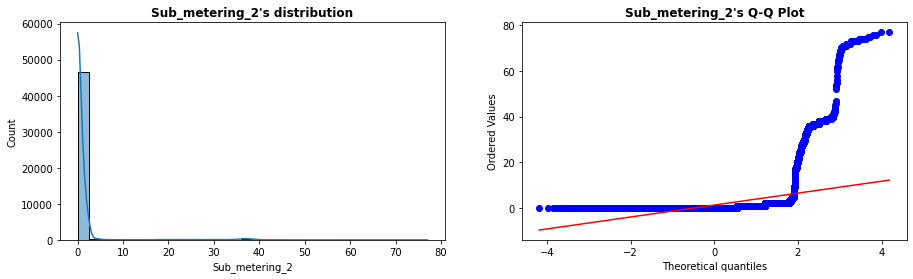

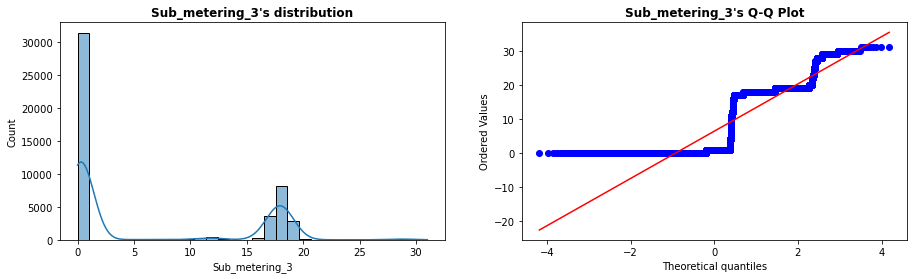

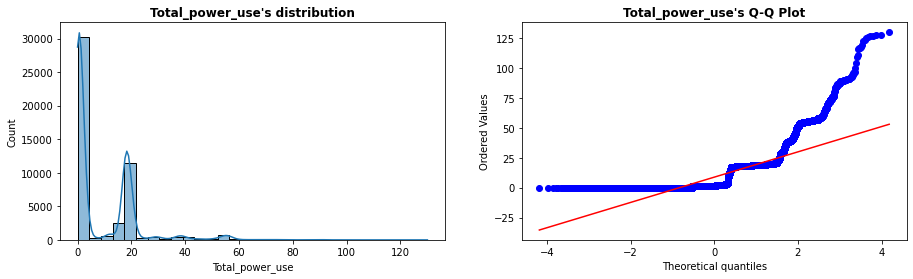

In [153]:
#checking each features distribution 
for feature in con_numerical_feature:
    plt.figure(figsize=(40,4))
    plt.subplot(151)
    sns.histplot(data=data_mongo, x=feature, kde=True, bins=30)
    plt.title("{}'s distribution".format(feature),fontweight="bold")
    plt.subplot(152)
    stats.probplot(data_mongo[feature],dist='norm',plot=plt)
    plt.title("{}'s Q-Q Plot".format(feature),fontweight="bold")
    plt.show()
    


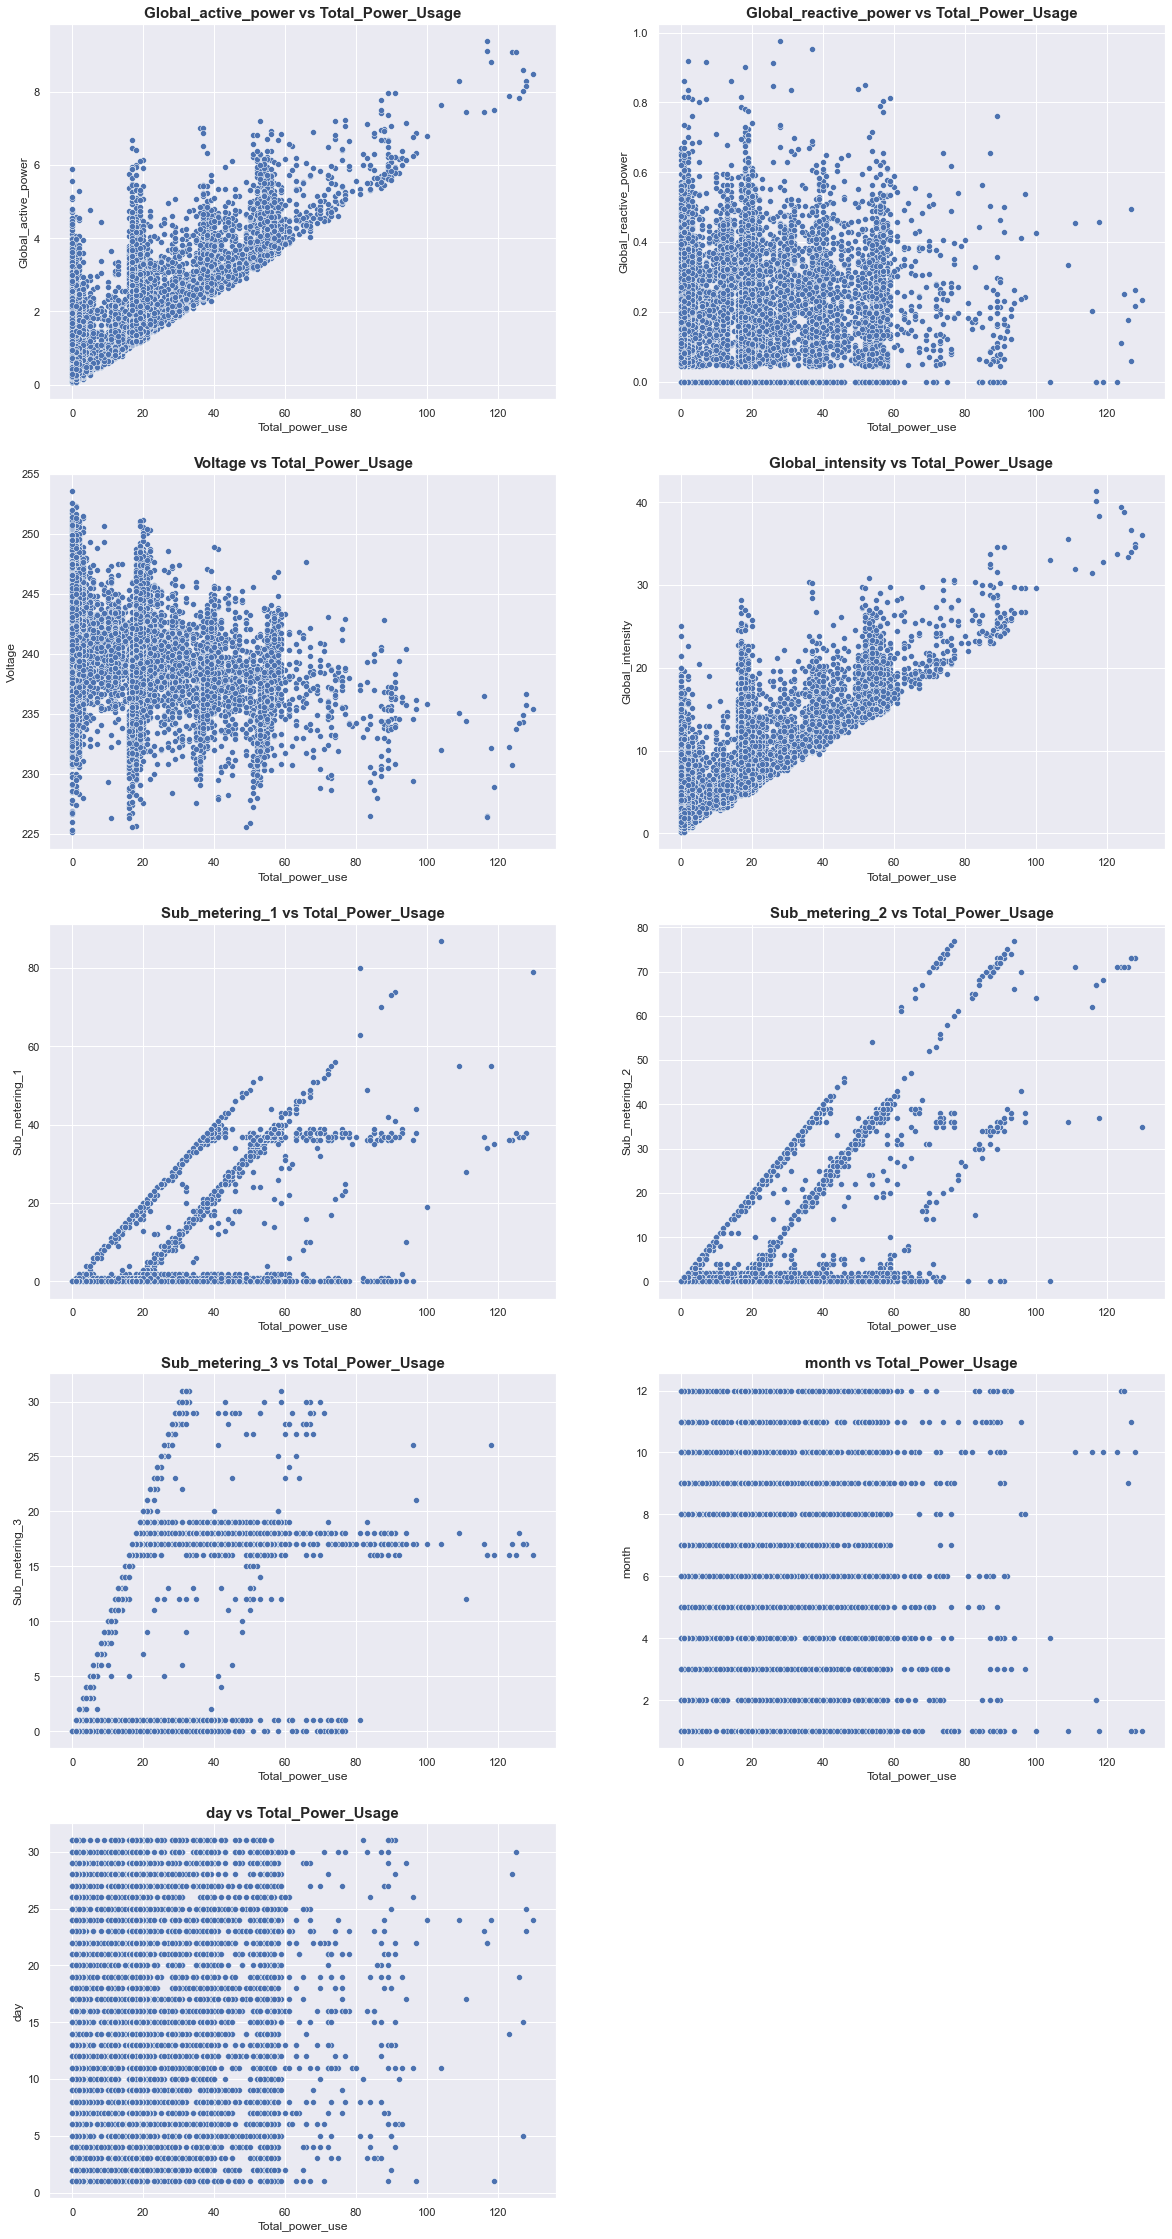

In [231]:
#Comparing Numerical features with Dependent feature
plt.figure(figsize=(20,40))
for i in enumerate([feature for feature in data_mongo.columns if feature not in ['Total_power_use']]):
 plt.subplot(5, 2, i[0]+1)
 sns.set(rc={'figure.figsize':(10,8)})
 sns.scatterplot(data=data_mongo, y=i[1], x='Total_power_use')
 plt.title("{} vs Total_Power_Usage".format(i[1]),fontsize=15, fontweight="bold")


# checking outliers

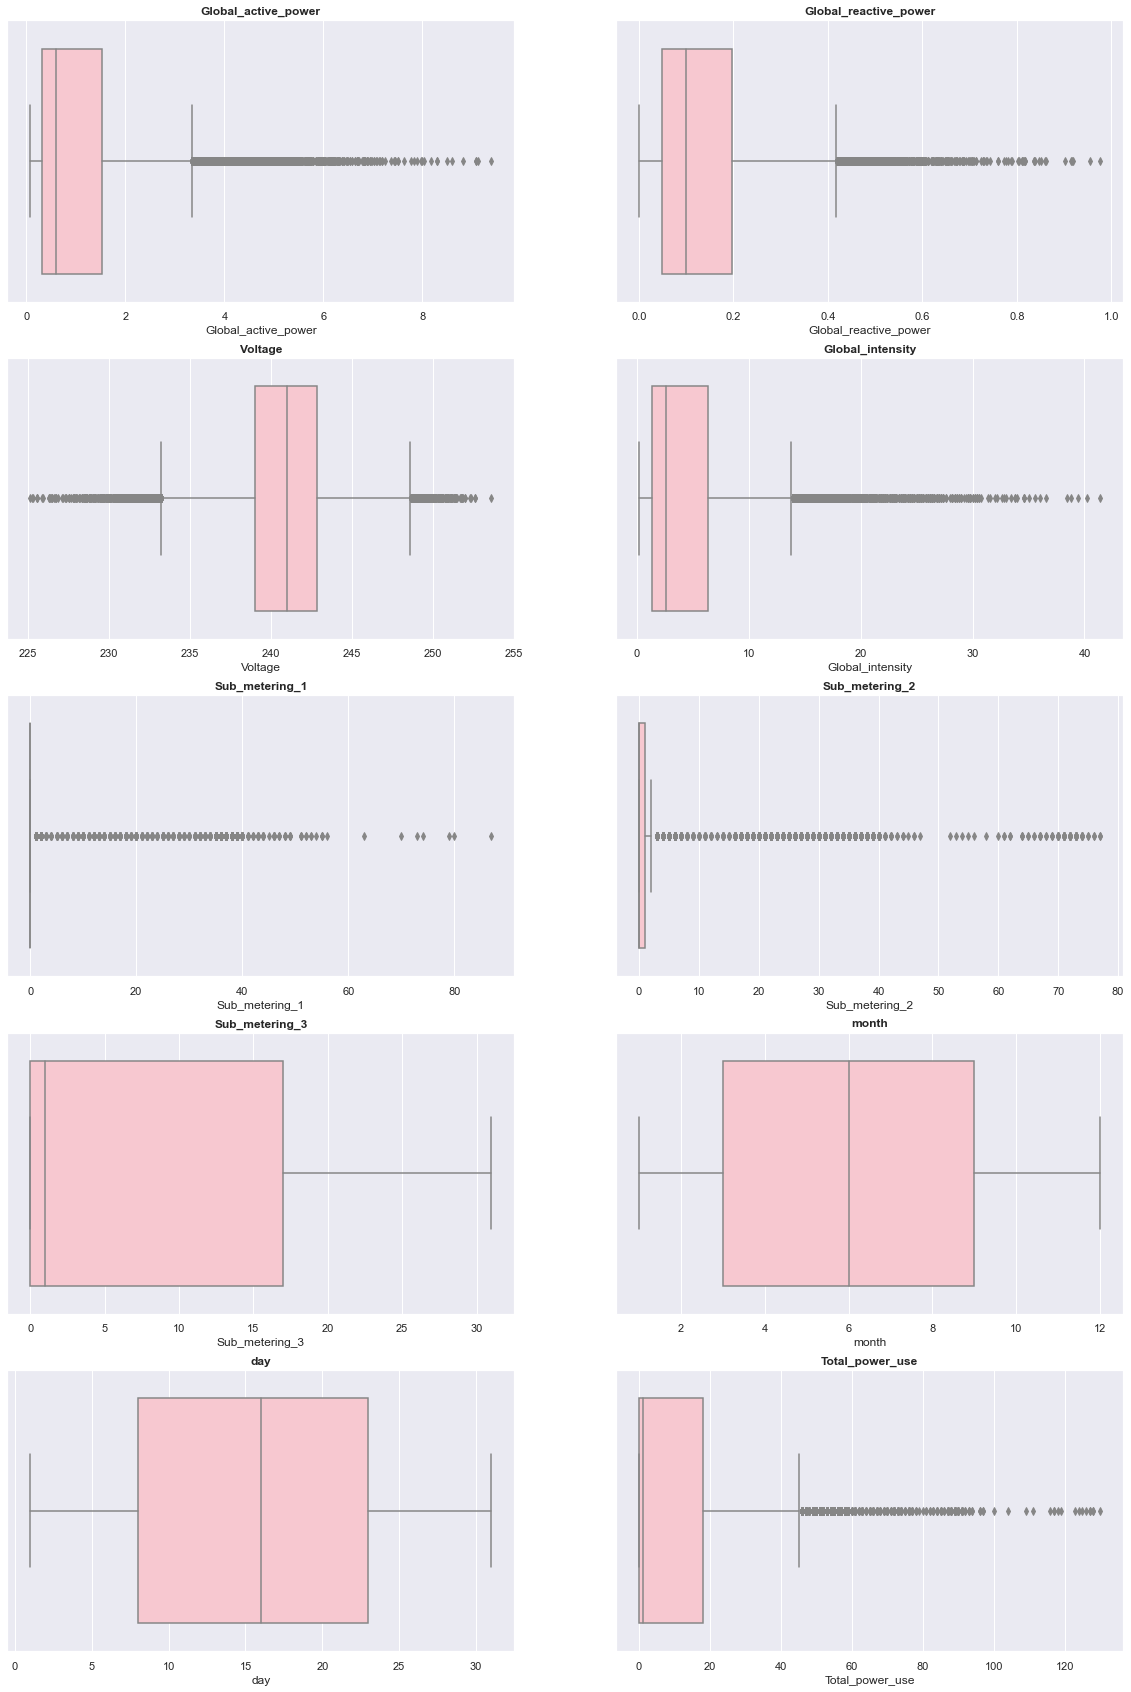

In [156]:
plt.figure(figsize=(20,30))
for i in enumerate(data_mongo.columns):
 plt.subplot(5, 2, i[0]+1)
 sns.set(rc={'figure.figsize':(10,6)})
 sns.boxplot(data=data_mongo, x=i[1], color='pink')
 plt.title("{}".format(i[1]), fontweight="bold")

In [160]:
#checking correlation and heatmap
corr = data_mongo.corr()
corr

Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.244766 -0.390641   
Global_reactive_power             0.244766               1.000000 -0.108004   
Voltage                          -0.390641              -0.108004  1.000000   
Global_intensity                  0.998839               0.263989 -0.402240   
Sub_metering_1                    0.488997               0.137683 -0.199664   
Sub_metering_2                    0.425305               0.135259 -0.158025   
Sub_metering_3                    0.639900               0.082243 -0.264970   
month                            -0.032977               0.031103 -0.017381   
day                               0.005297               0.001707  0.025414   
Total_power_use                   0.847615               0.180873 -0.341562   

                       Global_intensity  Sub_metering_1  Sub_metering_2  \
Global_active_power            0.998839        0.488997        0.425305   
Global_reactive_power          0.263989        0.137683        0.135259   
Voltage                       -0.402240       -0.199664       -0.158025   
Global_intensity               1.000000        0.494453        0.431190   
Sub_metering_1                 0.494453        1.000000        0.057219   
Sub_metering_2                 0.431190        0.057219        1.000000   
Sub_metering_3                 0.627577        0.100251        0.076500   
month                         -0.031426       -0.004900       -0.005057   
day                            0.004304        0.002499       -0.000950   
Total_power_use                0.844722        0.572914        0.523802   

                       Sub_metering_3     month       day  Total_power_use  
Global_active_power          0.639900 -0.032977  0.005297         0.847615  
Global_reactive_power        0.082243  0.031103  0.001707         0.180873  
Voltage                     -0.264970 -0.017381  0.025414        -0.341562  
Global_intensity             0.627577 -0.031426  0.004304         0.844722  
Sub_metering_1               0.100251 -0.004900  0.002499         0.572914  
Sub_metering_2               0.076500 -0.005057 -0.000950         0.523802  
Sub_metering_3               1.000000 -0.033659  0.001932         0.742985  
month                       -0.033659  1.000000  0.017549        -0.026849  
day                          0.001932  0.017549  1.000000         0.002055  
Total_power_use              0.742985 -0.026849  0.002055         1.000000

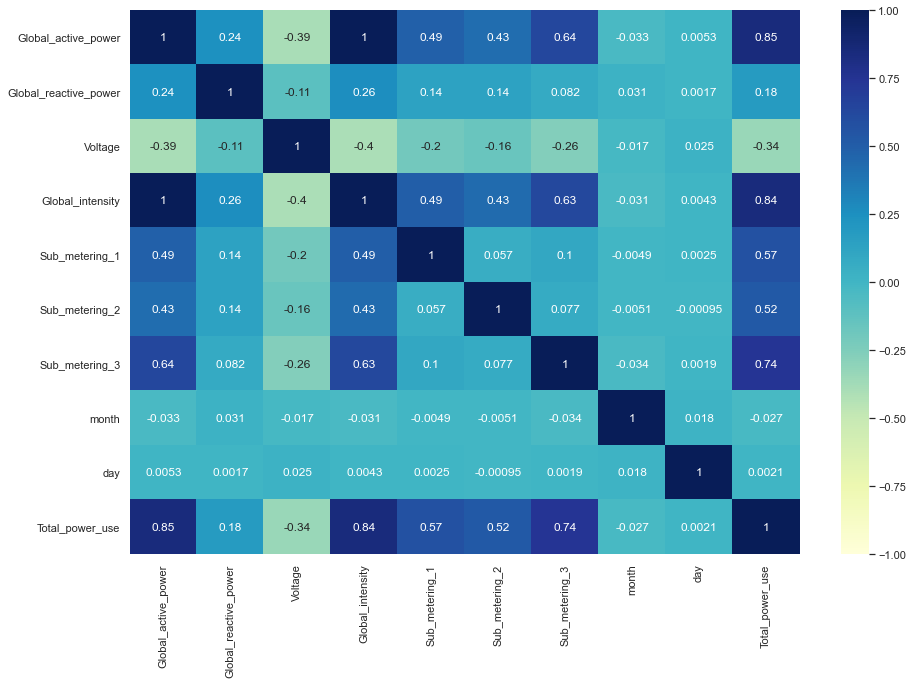

In [173]:
sns.heatmap(data=corr,vmax=1,vmin=-1,annot=True,cmap='YlGnBu')
sns.set(rc={'figure.figsize':(15,6)})


# Model and Evaluation 

In [177]:
#split the dependent and independent feature
X=data_mongo.drop('Total_power_use',axis=1)
y=data_mongo['Total_power_use']

In [182]:
X.head()

Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
0                0.192                  0.116   234.85               1.0   
1                0.252                  0.066   236.17               1.0   
2                2.236                  0.238   245.92               9.0   
3                0.420                  0.094   240.70               2.0   
4                1.810                  0.048   237.96               7.6   

   Sub_metering_1  Sub_metering_2  Sub_metering_3  month  day  
0               0               0               0      7   29  
1               0               0               1      5    5  
2               0               0              19      1   15  
3               0               0               1      7   29  
4               0               0              18     10    6

In [181]:
y.head()

0     0
1     1
2    19
3     1
4    18
Name: Total_power_use, dtype: int64

In [185]:
#perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=19)

In [186]:
X_train.head()

Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
25074                1.400                  0.000   240.86               5.8   
18075                0.208                  0.000   236.31               0.8   
13328                0.110                  0.000   240.01               0.6   
629                  0.144                  0.000   235.64               0.6   
37771                0.308                  0.096   243.38               1.2   

       Sub_metering_1  Sub_metering_2  Sub_metering_3  month  day  
25074               0               0              18     11   27  
18075               0               0               0      3    7  
13328               0               0               0      9   21  
629                 0               0               0      7   31  
37771               0               0               0      1   26

In [187]:
y_train.head()

25074    18
18075     0
13328     0
629       0
37771     0
Name: Total_power_use, dtype: int64

In [188]:
X_test.head()

Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
14505                1.980                  0.202   238.91               8.2   
34509                1.528                  0.082   237.30               6.4   
20166                1.746                  0.434   241.70               7.8   
22022                0.256                  0.128   243.39               1.2   
25410                0.342                  0.116   242.29               1.4   

       Sub_metering_1  Sub_metering_2  Sub_metering_3  month  day  
14505               0               0              30      6   21  
34509               1               0              18     11    1  
20166               0               0               0     12    2  
22022               0               0               1      8    8  
25410               0               0               1      4   24

In [189]:
y_test.head()

14505    30
34509    19
20166     0
22022     1
25410     1
Name: Total_power_use, dtype: int64

In [191]:
#both will have same values
X_train.shape, y_train.shape

((36277, 9), (36277,))

In [192]:
X_test.shape, y_test.shape

((12093, 9), (12093,))

Feature Scaling

In [196]:
scaler = StandardScaler()
scaler

StandardScaler()

In [197]:
X_train= scaler.fit_transform(X_train)
X_train

array([[ 0.30745896, -1.10003026,  0.00339227, ...,  1.3738112 ,
         1.36360983,  1.28577778],
       [-0.83257285, -1.10003026, -1.41746115, ..., -0.76202113,
        -0.99589811, -0.98897566],
       [-0.9263003 , -1.10003026, -0.26204188, ..., -0.76202113,
         0.77373285,  0.60335175],
       ...,
       [ 0.79904986, -0.56611272, -0.96778446, ...,  1.25515384,
         1.36360983, -0.19281196],
       [-0.83066005, -1.10003026, -0.8272605 , ..., -0.76202113,
        -1.2908366 ,  1.51325313],
       [-0.36011   ,  0.16357458,  0.55299712, ...,  0.42455239,
         0.47879435, -0.64776265]])

In [198]:
X_test= scaler.transform(X_test)
X_test

array([[ 0.86217242,  0.69749212, -0.60554491, ...,  2.79769941,
        -0.11108263,  0.60335175],
       [ 0.42987848, -0.37034296, -1.10830843, ...,  1.3738112 ,
         1.36360983, -1.6714017 ],
       [ 0.63837423,  2.76197327,  0.26570368, ..., -0.76202113,
         1.65854833, -1.55766403],
       ...,
       [ 0.29789493, -0.19237044, -0.02471252, ..., -0.76202113,
         1.65854833, -0.98897566],
       [ 1.93143045,  1.58735468, -1.12079945, ...,  1.3738112 ,
        -1.5857751 ,  0.03466339],
       [ 0.90234133, -0.08558694,  1.16817981, ...,  1.49246855,
        -1.2908366 ,  1.05830244]])

# linear Regression

In [200]:
linear_reg = LinearRegression()
linear_reg

LinearRegression()

In [201]:
linear_reg.fit(X_train,y_train)
linear_reg_pred = linear_reg.predict(X_test)
linear_reg_pred


array([ 3.0000000e+01,  1.9000000e+01, -8.8817842e-15, ...,
       -1.0658141e-14,  1.8000000e+01,  1.9000000e+01])

In [213]:
linear_r2_score = r2_score(y_test,linear_reg_pred)
print("Accuray of r square is {} %".format(linear_r2_score*100))

Accuray of r square is 100.0 %


In [214]:
linear_adj_r2score = 1-(1-linear_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Accuray of adjusted r square is {} %".format(linear_adj_r2score*100))

Accuray of adjusted r square is 100.0 %


# Lasso Regression 

In [215]:
lasso_reg = Lasso()
lasso_reg

Lasso()

In [217]:
lasso_reg.fit(X_train,y_train)
lasso_pred = lasso_reg.predict(X_test)
lasso_pred

array([27.26336073, 17.71844491,  2.50633173, ...,  2.08977677,
       18.77824011, 18.33532198])

In [218]:
lasso_r2_score = r2_score(y_test,lasso_pred)
print("Accuray of r square is {} %".format(lasso_r2_score*100))

Accuray of r square is 98.16485815871022 %


In [219]:
lasso_adj_r2score = 1-(1-lasso_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Accuray of adjusted r square is {} %".format(lasso_adj_r2score*100))

Accuray of adjusted r square is 98.16349125673457 %


# Elastic Net Regression

In [220]:
elasticnet_reg = ElasticNet()
elasticnet_reg

ElasticNet()

In [221]:
elasticnet_reg.fit(X_train,y_train)
elasticnet_pred=elasticnet_reg.predict(X_test)
elasticnet_pred

array([22.13607934, 15.39963485,  7.72296938, ...,  6.05807016,
       21.39079177, 16.99346114])

In [222]:
elasticnet_r2_score = r2_score(y_test,elasticnet_pred)
print("Accuray of r square is {} %".format(elasticnet_r2_score*100))

Accuray of r square is 90.00733467457752 %


In [223]:
elasticnet_adj_r2score = 1-(1-elasticnet_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Accuray of adjusted r square is {} %".format(elasticnet_adj_r2score*100))

Accuray of adjusted r square is 89.99989165645877 %


# Ridge Regression

In [224]:
ridge_reg= Ridge()
ridge_reg

Ridge()

In [225]:
ridge_reg.fit(X_train, y_train)
ridge_pred=ridge_reg.predict(X_test)
ridge_pred


array([2.99989206e+01, 1.89995319e+01, 1.22076842e-03, ...,
       1.08084365e-03, 1.80009634e+01, 1.89999410e+01])

In [226]:
ridge_r2_score = r2_score(y_test,ridge_pred)
print("Accuray of r square is {} %".format(ridge_r2_score*100))

Accuray of r square is 99.99999979188684 %


In [227]:
ridge_adj_r2score = 1-(1-ridge_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Accuray of adjusted r square is {} %".format(ridge_adj_r2score*100))

Accuray of adjusted r square is 99.99999979173182 %


# Support Vector Regressor

In [232]:
svr_reg = SVR()
svr_reg

SVR()

In [233]:
svr_reg.fit(X_train,y_train)
svr_pred = svr_reg.predict(X_test)
svr_pred

array([29.93446343, 18.90365826,  1.67027605, ...,  0.0509089 ,
       18.12767807, 19.02502398])

In [234]:
svr_r2_score = r2_score(y_test,svr_pred)
print("Accuray of r square is {} %".format(svr_r2_score*100))

Accuray of r square is 96.03551489683953 %


In [235]:
svr_adj_r2score = 1-(1-svr_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Accuray of adjusted r square is {} %".format(svr_adj_r2score*100))

Accuray of adjusted r square is 96.0325619575092 %


# Comparision between Models

In [247]:
print(" Accuray of all models are given below\n")
print(" Linear Regression Model has {} % accuracy\n Ridge Regression Model has {} % accuracy\n Lasso Regression Model has {} % accuracy\n Elastic-net Regression Model has {} % accuracy".format(round(linear_r2_score*100),round(ridge_r2_score*100),round(lasso_r2_score*100),round(elasticnet_r2_score*100)))
print(" Support vector Regressor Model has {} % accuracy\n".format(round(svr_r2_score*100)))
print(" Linear and Ridge are best models for Household power dataset")

 Accuray of all models are given below

 Linear Regression Model has 100 % accuracy
 Ridge Regression Model has 100 % accuracy
 Lasso Regression Model has 98 % accuracy
 Elastic-net Regression Model has 90 % accuracy
 Support vector Regressor Model has 96 % accuracy

 Linear and Ridge are best models for Household power dataset
